<a href="https://colab.research.google.com/github/SalRez0810/2025_Computer_Vision_TI_2A/blob/main/Praktikum_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

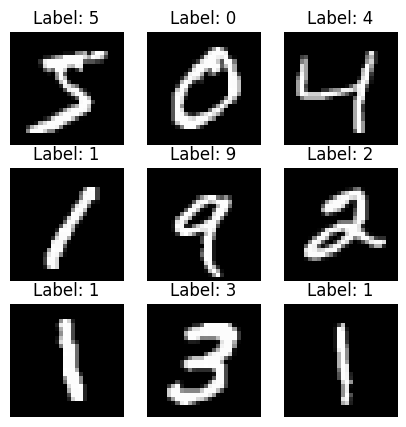

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

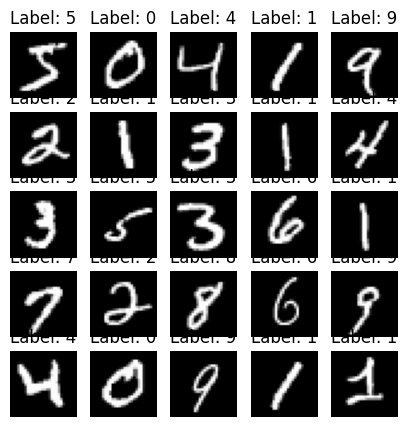

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [4]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi dengan kernel RBF:", accuracy_score(y_test, y_pred))

Akurasi dengan kernel RBF: 0.9513


# Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8998 - loss: 0.3508 - val_accuracy: 0.9792 - val_loss: 0.0754
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9797 - loss: 0.0657 - val_accuracy: 0.9865 - val_loss: 0.0515
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9876 - loss: 0.0420 - val_accuracy: 0.9842 - val_loss: 0.0610
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9863 - val_loss: 0.0477
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9947 - loss: 0.0186 - val_accuracy: 0.9882 - val_loss: 0.0459


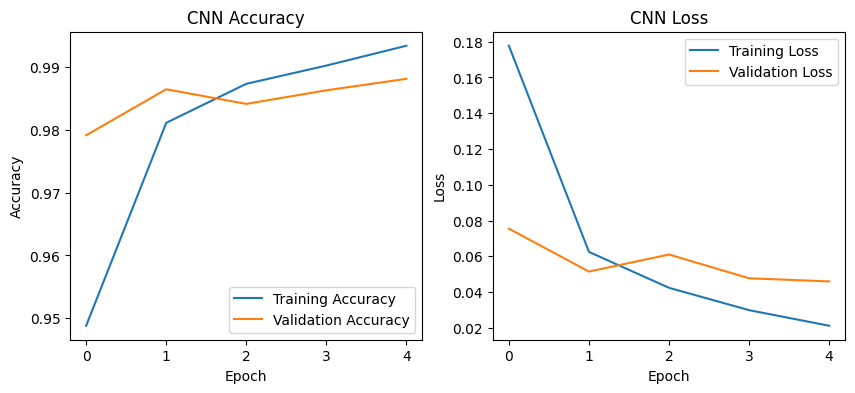

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn  = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9188 - loss: 0.2760 - val_accuracy: 0.9865 - val_loss: 0.0533
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9895 - val_loss: 0.0373
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9931 - loss: 0.0238 - val_accuracy: 0.9890 - val_loss: 0.0403
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9938 - loss: 0.0183 - val_accuracy: 0.9870 - val_loss: 0.0471
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9962 - loss: 0.0107 - val_accuracy: 0.9910 - val_loss: 0.0383


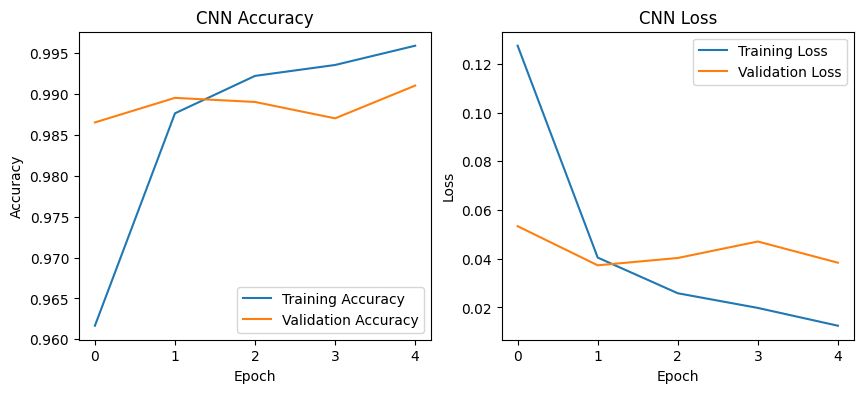

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn  = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),   # <<< tambahan Conv2D
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.3832 - loss: 1.7005 - val_accuracy: 0.5856 - val_loss: 1.2008
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.5913 - loss: 1.1545 - val_accuracy: 0.6290 - val_loss: 1.0505
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6522 - loss: 0.9862 - val_accuracy: 0.6504 - val_loss: 1.0171
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.6840 - loss: 0.8982 - val_accuracy: 0.6820 - val_loss: 0.9297
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7073 - loss: 0.8302 - val_accuracy: 0.6938 - val_loss: 0.8911
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7360 - loss: 0.7622 - val_accuracy: 0.6874 - val_loss: 0.9098
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.7514 - loss: 0.7124 - val_accuracy: 0.7002 - val_loss: 0.8845
Epoch 8/10
1407/1407 ━━

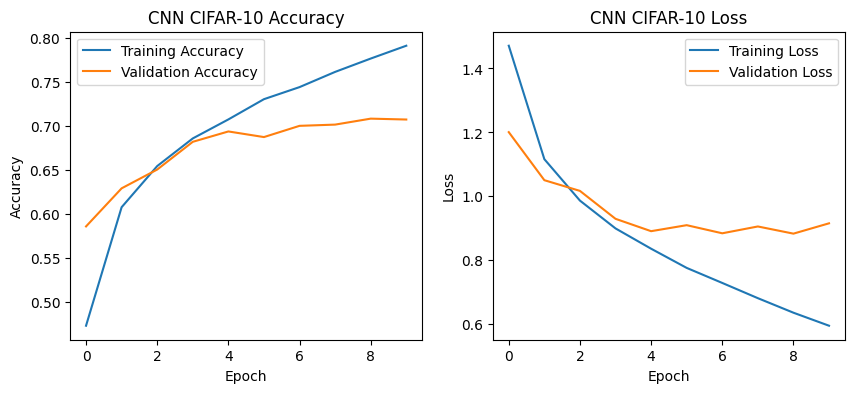

In [7]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.2660 - loss: 1.9535 - val_accuracy: 0.4948 - val_loss: 1.4392
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.4329 - loss: 1.5469 - val_accuracy: 0.5638 - val_loss: 1.2596
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.4868 - loss: 1.4208 - val_accuracy: 0.5922 - val_loss: 1.1800
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5238 - loss: 1.3257 - val_accuracy: 0.6194 - val_loss: 1.1027
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.5496 - loss: 1.2552 - val_accuracy: 0.6340 - val_loss: 1.0746
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5637 - loss: 1.2149 - val_accuracy: 0.6496 - val_loss: 1.0170
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5850 - loss: 1.1587 - val_accuracy: 0.6480 - val_loss: 1.0057
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5973 -

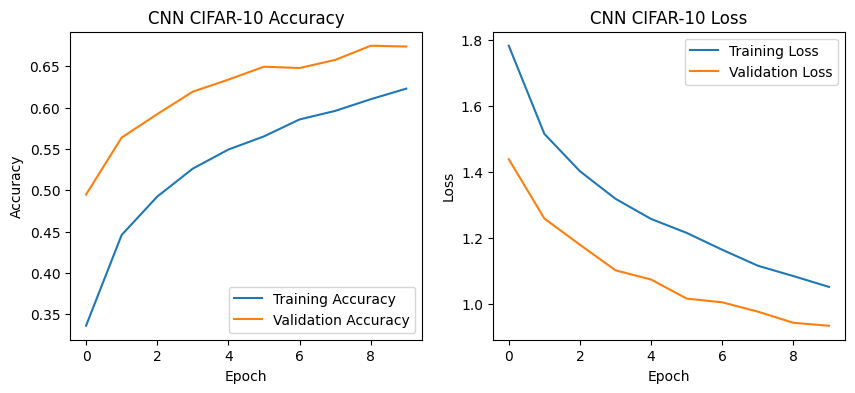

In [8]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),                     # <<< tambahan Dropout
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D5 – Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 602s 427ms/step - accuracy: 0.4564 - loss: 1.5561 - val_accuracy: 0.5788 - val_loss: 1.2069
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 619s 440ms/step - accuracy: 0.5772 - loss: 1.2085 - val_accuracy: 0.5864 - val_loss: 1.1756
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 596s 424ms/step - accuracy: 0.6044 - loss: 1.1388 - val_accuracy: 0.6064 - val_loss: 1.1296
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 646s 441ms/step - accuracy: 0.6163 - loss: 1.0982 - val_accuracy: 0.6002 - val_loss: 1.1116
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 441ms/step - accuracy: 0.6327 - loss: 1.0556 - val_accuracy: 0.6078 - val_loss: 1.1276


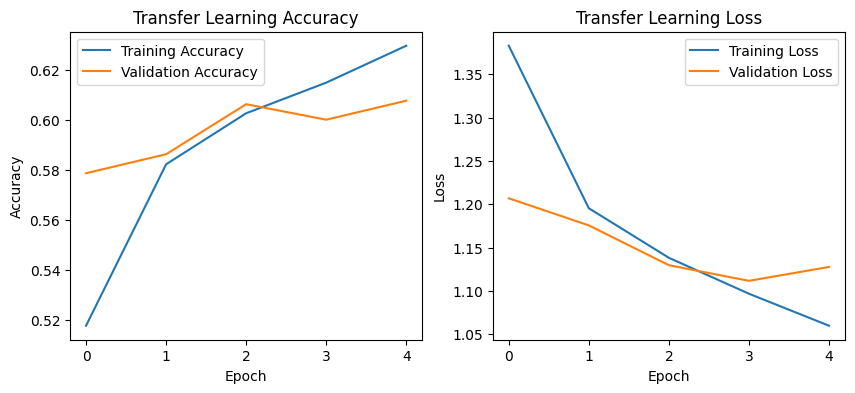

In [9]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))
base_model.trainable = False

from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 688s 488ms/step - accuracy: 0.5116 - loss: 1.3932 - val_accuracy: 0.6382 - val_loss: 1.0589
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 740s 487ms/step - accuracy: 0.6301 - loss: 1.0491 - val_accuracy: 0.5962 - val_loss: 1.1197
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 663s 472ms/step - accuracy: 0.6578 - loss: 0.9744 - val_accuracy: 0.6610 - val_loss: 0.9817
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 706s 488ms/step - accuracy: 0.6755 - loss: 0.9179 - val_accuracy: 0.6742 - val_loss: 0.9672
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 737s 485ms/step - accuracy: 0.6956 - loss: 0.8673 - val_accuracy: 0.6684 - val_loss: 0.9685


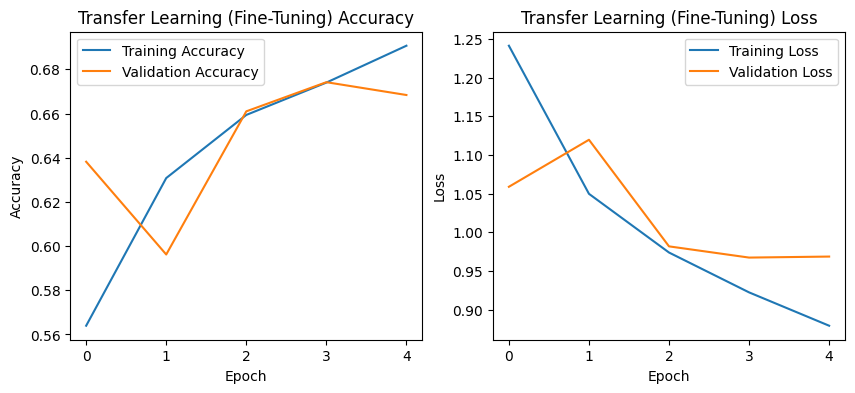

In [10]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32,32,3))

base_model.trainable = True

# Hanya aktifkan 2 lapisan terakhir untuk fine-tuning
for layer in base_model.layers[:-2]:
    layer.trainable = False

from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning (Fine-Tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning (Fine-Tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 381ms/step
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1000
           1       0.81      0.72      0.76      1000
           2       0.55      0.65      0.59      1000
           3       0.46      0.47      0.47      1000
           4       0.61      0.54      0.57      1000
           5       0.60      0.56      0.58      1000
           6       0.71      0.65      0.68      1000
           7       0.66      0.78      0.71      1000
           8       0.81      0.75      0.78      1000
           9       0.79      0.64      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



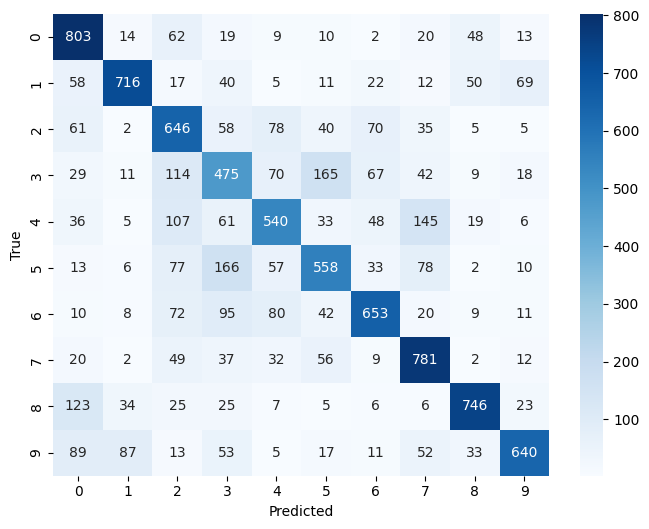

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 386ms/step
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1000
           1       0.81      0.72      0.76      1000
           2       0.55      0.65      0.59      1000
           3       0.46      0.47      0.47      1000
           4       0.61      0.54      0.57      1000
           5       0.60      0.56      0.58      1000
           6       0.71      0.65      0.68      1000
           7       0.66      0.78      0.71      1000
           8       0.81      0.75      0.78      1000
           9       0.79      0.64      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



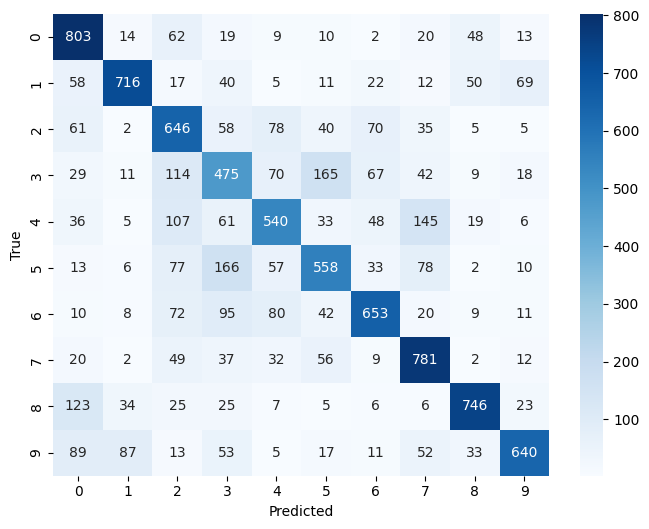

Kelas yang paling sering salah diklasifikasikan adalah: 3
Jumlah salah klasifikasi: 525


In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ==== Analisis tambahan ====
# Hitung kesalahan per kelas
errors_per_class = cm.sum(axis=1) - np.diag(cm)
most_misclassified = np.argmax(errors_per_class)

print("Kelas yang paling sering salah diklasifikasikan adalah:", most_misclassified)
print("Jumlah salah klasifikasi:", errors_per_class[most_misclassified])

# PENUGASAN

Pre-process gambar agar sesuai format MNIST (28×28, grayscale)

In [30]:
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
      Konversi ke grayscale
      Auto-contrast
      (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
      Crop ke bounding box digit
      Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
      Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8   # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]
    return canvas, arr

Prediksi dengan CNN dari D3

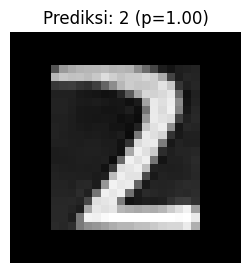

Rekap Prediksi (CNN):
- Angka.jpg -> 2 (p=0.998)


In [31]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)    # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)             # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]    # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")

Prediksi dengan SVM dari D2

In [35]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    _, x = preprocess_to_mnist_28x28(img_pil)   # x: (28,28,1) float [0,1]
    x_flat = x.reshape(1, -1)                   # (1,784)

    pred = int(clf.predict(x_flat)[0])

    # SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
    # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
    conf = None
    try:
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))
    except Exception:
        pass

    results.append((fname, pred, conf))

    # Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
    print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p={conf:.2f})" if conf is not None else ""))

Angka.jpg -> Prediksi SVM: 2
